$\textbf{Fast Fourier Transform (FFT)}$

Lets start with $\textbf{Discrte Fourier Transform (DFT)}$


The Discrete Fourier Transform (DFT) is a mathematical transformation that converts a finite sequence of equally spaced samples of a function into a sequence of complex numbers, representing the function's frequency domain representation. It's widely used in various fields such as signal processing, image processing, and data analysis to analyze the frequency content of a signal or discrete data.

Given a set of data point $(t_k, f_k)$. The DFT coefficients are given by
$$\begin{equation}
\hat {f_k}= \sum \limits_{j=0}^{n-1} e^{-i2\pi jk/n}f_j
\end{equation}$$
Similarly,the inverse transformation can be expressed as:
$${f_k}= \frac{1}{n}\sum \limits_{j=0}^{n-1}e^{i2\pi jk/n}\hat{f_j} $$
Now, introducing the fundamental frequency term
$$ \omega_n = e^{-i2\pi/n}$$
where $n$ represents the total number of data points, the Fourier coefficient can be redefined as:
$$\hat {f_k}= \sum \limits_{j=0}^{n-1} \omega_n^{jk}f_j$$
This can be expressed in matrix form as
$$
\begin{bmatrix}
\hat {f_0}\\
\hat {f_1}\\
\hat {f_2}\\
\hat {f_3}\\
\vdots\\
\hat {f_{n-1}}
\end{bmatrix}
=
\begin{bmatrix}
1&1&1&&1\\
1&\omega_n&\omega_n^2&\cdots&\omega_n^{n-1}\\
1&\omega_n^2&\omega_n^4&\cdots&\omega_n^{2(n-1)}\\
1&\omega_n^3&\omega_n^6&\cdots&\omega_n^{3(n-1)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega_n^{n-1}&\omega_n^{2(n-1)}&&\omega_n^{(n-1)^2}\\
\end{bmatrix}
\begin{bmatrix}
{f_0}\\
{f_1}\\
{f_2}\\
{f_3}\\
\vdots\\
{f_{n-1}}
\end{bmatrix}$$
Let us rewrite it as 
$$\hat f=F\bar f$$
Where $F$ is known as DFT matrix.

In order to understand the context a bit, lets assume there are $n$ datapoints, ie. $n$ $t$ values and corresponding $n$ $f$ values. Now the DFT matrix is an $n\times n$ matrix. Meaning the total number of mltiplication is $n^2$, hence the computation time is of the order $n^2$.

$$\textbf{Fast Fourier Transform (FFT)}$$

The Fast Fourier Transform (FFT) is an algorithm used to efficiently compute the discrete Fourier transform (DFT) and its inverse. It was developed by James Cooley and John Tukey in 1965. FFT significantly speeds up the computation of the DFT by exploiting symmetries and redundancies in the computation process, making it essential in various fields including signal processing, image processing, and data compression.

lets try rearrnging the $\bar f$ matrix such that even $f$s are stacked at the top and odd $f$s are stacked below and lets call that matrix $\bar f_R$. This can be done by the following matrix operation on $\bar f$.
$$\bar f_R=T\bar f$$
For $n=8$, $\bar f_R$ is given by
$$\bar f_R=
\begin{bmatrix}
1&0&0&0&0&0&0&0\\
0&0&1&0&0&0&0&0\\
0&0&0&0&1&0&0&0\\
0&0&0&0&0&0&1&0\\
0&1&0&0&0&0&0&0\\
0&0&0&1&0&0&0&0\\
0&0&0&0&0&1&0&0\\
0&0&0&0&0&0&0&1\\
\end{bmatrix}
\begin{bmatrix}
{f_0}\\
{f_1}\\
{f_2}\\
{f_3}\\
{f_4}\\
{f_5}\\
{f_6}\\
{f_7}\\
\end{bmatrix}
$$
Perform the matrix multiplication yourself and see it actually rearranges in said manner. You can also examine that the matrix $T$ is orthogonal i.e $T^TT=1$. Let's do the following operation,
$$\hat f=FT^TT\bar f$$
$$\hat f=F_R\bar f_R$$
where $FT^T=F_R$. ie. The rearranged DFT matrix after operating  $T^T$ from thr right side on $F$

The FFT algorithm is the realiization that the rearranged DFT matrix  for $n=2^k$ is of the form 
$$ (F_R)_{n}=
\begin{bmatrix}
I_{n/2}& D_{n/2}\\
I_{n/2}& -D_{n/2}\\
\end{bmatrix}
\begin{bmatrix}
F_{n/2}& O_{n/2}\\
O_{n/2}& F_{n/2}\\
\end{bmatrix}
$$
Where
$$I_{n/2}=
\begin{bmatrix}
1&0&0&\cdots&0\\
0&1&0&\cdots&0\\
0&0&1&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&0\\
0&0&0&\cdots&1\\
\end{bmatrix}
$$
or the identity matrix of dimension $n/2 \times n/2$. and 
$$D_{n/2}=
\begin{bmatrix}
1&0&0&\cdots&0\\
0&\omega_{n}&0&\cdots&0\\
0&0&\omega_{n}^2&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&0\\
0&0&0&\cdots&\omega_{n}^{n/2-1}\\
\end{bmatrix}
$$
and $F_{n/2}$ is the DFT matrix with number of datapoints $n/2$ and $O_{n/2}$ is the zero matrix of dimension $n/2 \times n/2$.

As it can be seen, the multiplication of the first matrix comes for free, and the second matrix is basically $2 \left(\frac{n}{2}\right)^2$ multiplications. This reduces the multiplication time by half. We can repeat the above process for $F_{n/2}$, further reducing the time by half again. Eventually, we will be dealing with $2 \times 2$ matrices, reducing the computational time further and further. The resultant computational time will be of the order of $n \log n$.

The Fast Fourier Transform (FFT) stands as one of the most significant algorithms, if not the paramount one. Major programming languages like Python and Matlab already incorporate this algorithm, sparing us the arduous task of coding it from scratch; we only need to understand its application. Nonetheless, from an academic perspective, it would be worthwhile to compare the time taken by the brute force method and FFT.


In [127]:
import numpy as np
import time 
import matplotlib.pyplot as plt

In [155]:
K=8
T=np.zeros((K,K))
for i in range (K):
    row=i
    if row<K/2:
        idx=row*2
    else:
        idx=(row-K/2)*2+1
    T[int(row),int(idx)]=1
        

In [156]:
T

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [157]:
TT=np.transpose(T)

In [162]:
np.dot(T,TT)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [163]:
def WN(N):
    return np.round(np.exp(-2*np.pi*1j/N),10)


In [164]:
WN(8)

(0.7071067812-0.7071067812j)

In [165]:
def FN(N):
    F=np.zeros((N,N),dtype="complex")
    for p in range (N):
        for k in range(N):
            F[p,k]=WN(N)**(p*k)
    return F

In [166]:
def DN(N):
    F=np.zeros((int(N/2),int(N/2)),dtype="complex")
    for p in range (int(N/2)):
        F[p,p]=WN(N)**(p)
    return F
    

In [167]:
def ZN(N):
    return np.zeros((N,N),dtype="complex")

In [168]:
Inb2 = np.identity(int(K/2))

In [169]:
Fn=FN(K)
Fnb2=FN(int(K/2))
Dnb2=DN(int(K))
Znb2=ZN(int(K/2))

In [170]:
Fr1=np.bmat([[Inb2, Dnb2], [Inb2, -1*Dnb2]])

In [171]:
Fr2=np.bmat([[Fnb2, Znb2], [Znb2, Fnb2]])


In [172]:
Fr=np.dot(Fr1,Fr2)

In [173]:
Frp=np.dot(Fn,TT)

In [174]:
dF=Fr-Frp

In [175]:
np.round(dF,5)

matrix([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         -0.-0.j],
        [ 0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,
          0.-0.j],
        [ 0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.-0.j,
          0.-0.j],
        [ 0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,
          0.+0.j],
        [ 0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j,  0.+0.j,
         -0.+0.j]])

Well, Thats all we gonna discuss about the algorithm. Programming languages already have the FFT algorith built in them. Lets use it do some cool stuff.

$\textbf{FFT Examples}$

In [143]:
M=int(2**11)
t=np.linspace(0,1,M)
f=2*np.sin(2*np.pi*50*t)+2*np.sin(2*np.pi*120*t)
f_c=f

f=f+2.5*np.random.randn(len(t))

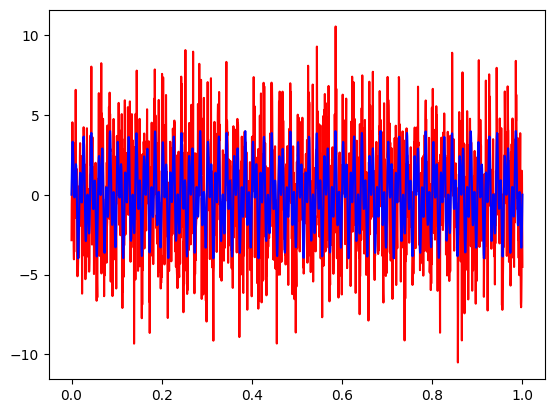

In [144]:
plt.plot(t,f,color="r")
plt.plot(t,f_c,color="b")

In [145]:
n=len(t)
dt=t[1]-t[0]
fp=np.fft.fft(f,n)
p=(fp*np.conj(fp)/n).real
fr=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype="int")

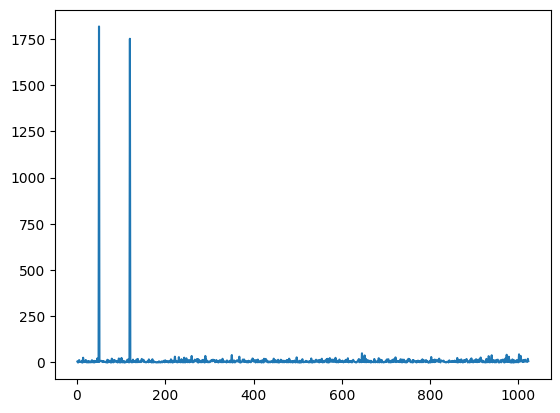

In [146]:
plt.plot(fr[L],p[L])

In [147]:
ind=p>100
p_c=p*ind
fp=fp*ind
fi=np.fft.ifft(fp)

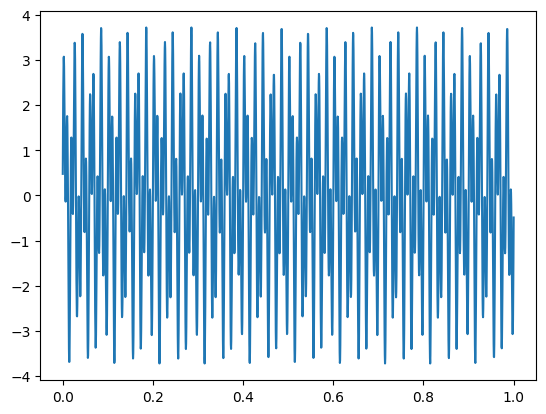

In [148]:
plt.plot(t,fi)

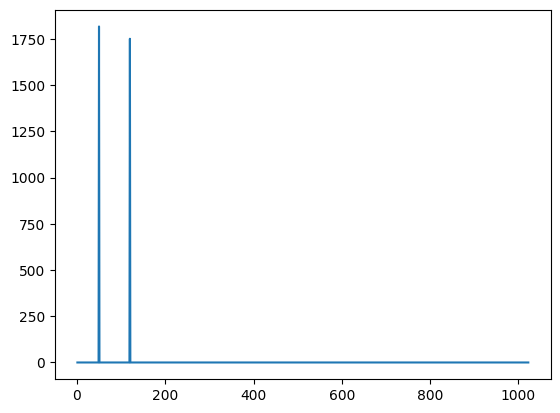

In [149]:
plt.plot(fr[L],p_c[L])

In [150]:
DF=FN(M)
DFT=np.dot(DF,f)

In [151]:
DP=(DFT*np.conj(DFT)/n).real
DFr=(1/(dt*n))*np.arange(n)
DL=np.arange(1,np.floor(n/2),dtype="int")

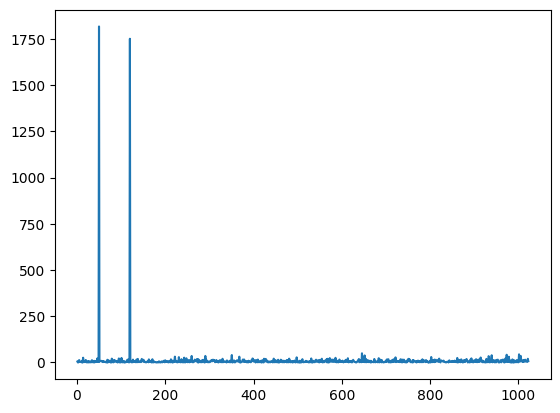

In [152]:
plt.plot(DFr[DL],DP[L])